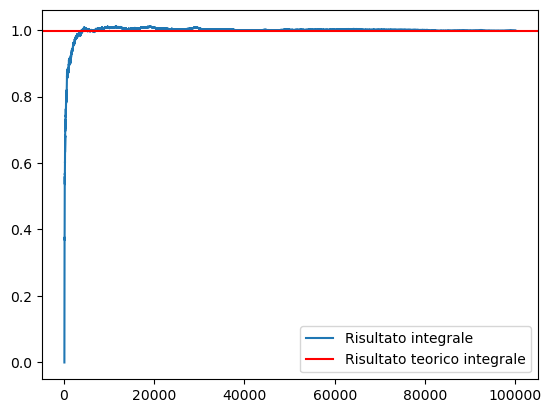

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def function(x):
    return (2.7**(-0.5*(x**2)))/np.sqrt(2*3.14)

a = -3
b = 3
# Il massimo lo ottengo, essendo una distribuzione normale, al centro quindi x = 0. Avremo che
M = 1 / np.sqrt(2*np.pi)

n_min = 100
n_max = 100000
n = n_max - n_min
n_range = np.arange(n_min, n_max, 1)
n_size = np.size(n_range)

# Genero una coppia (csi, eta) con csi ~ U([a,b]) e eta ~ U([0, M]) con M = MAX[a,b] di f(x)
x1 = np.random.rand(n) # Genero numeri in U([0,1])
csi = a + (b-a)*x1 # Normalizzo i numeri da U([0,1]) a U([a,b])
x2 = np.random.rand(n) # Genero numeri in U([0,1])
eta = M*x2 # Normalizzo i numeri da U([0,1]) a U([0,M])

y = np.where(eta <= function(csi), 1, 0) # verifico se posso accettare il valore di eta e di psi

#Siccome riduco il tutto a 1 e 0, se faccio la somma cumulata riesco ad ottenere Ns ossia il numero di successi
Ns = np.cumsum(y)
I = (Ns*M*(b-a))/n_range
I_teorico = norm.cdf(b)-norm.cdf(a)

plt.plot(n_range, I, label = "Risultato integrale")
plt.axhline(I_teorico, color = 'r', label = "Risultato teorico integrale")
plt.legend()
plt.show()

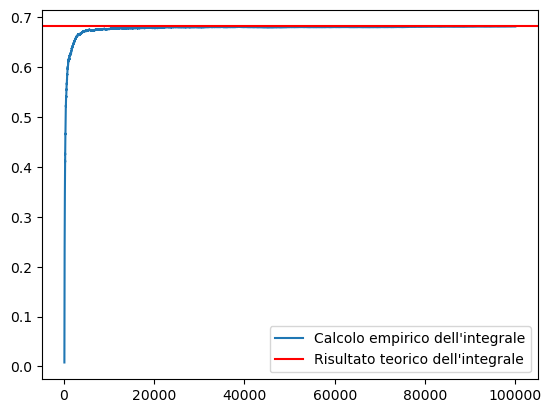

In [2]:
#Definisco le basi a, b, M
a = -1
b = 1
M = function(0)

#Definisco il mio range di valori
N_min = 100
N_max = 100000
N = N_max - N_min
N_range = np.arange(N_min, N_max, 1)

#Genero casualmente i numeri
X1 = np.random.rand(N) # ~ U([0,1])
ncsi = (b-a)*X1 + a # Normalizzo per U([a,b])
X2 = np.random.rand(N) # ~ U([0,1])
neta = M*X2 # Normalizzo per U([0, M])

#Creo un array con i valori accettati che contrassegno con 1 se accettati con 0 se non accettati
yy = np.where(neta <= function(ncsi), 1, 0)

NNs = np.cumsum(yy)
nI = NNs * (b-a) * M / N_range #voglio che sia un array considerato che lo inserirò all'interno di plt
nI_teorico = norm.cdf(b) - norm.cdf(a)

plt.plot(N_range, nI, label = "Calcolo empirico dell'integrale")
plt.axhline(nI_teorico, color = 'r', label = "Risultato teorico dell'integrale")
plt.legend()
plt.show()
